# Multiple Subplots

Sometimes it is helpful to compare diffrent views of data side by side To this end, Matplotlib has the ocncept of *subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts. In this section we'll explore four routines for creating subplots in Matplotlib.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')
import numpy as np

# `plt.axes`: Subplots by Hand

The most basic mtehod for creating an axes is to use the `plt.axes` function. As we've seen previously, by default this creates a stanard axes object that fills the entire figure. `plt.axes` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

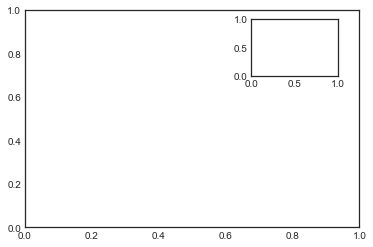

In [2]:
ax1 = plt.axes() # standard axes 
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented infertface is `fig.add_axes()`. Let's use this to create two vertically stacked axes:

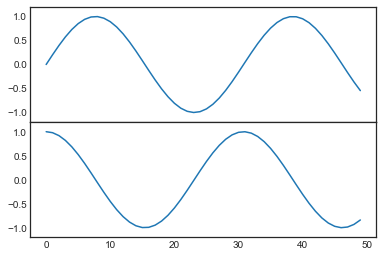

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                    xticklabels=[], ylim=(-1.2, 1.2))
                    
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                    ylim=(-1.2, 1.2))                    

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lowe panel (at position 0.1 + 0.4)